In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import keras
import imghdr
import os
import cv2
import warnings
import PIL.Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\aditi\AppData\Local\Temp\ipykernel_11112\1722930265.py:5: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
data = tf.keras.utils.image_dataset_from_directory("melanoma_cancer_dataset/train")

Found 9605 files belonging to 2 classes.


In [4]:
train_size = int(0.8 * len(data))
val_size =len(data) - train_size

In [5]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test =  tf.keras.utils.image_dataset_from_directory("melanoma_cancer_dataset/test")

Found 1000 files belonging to 2 classes.


In [ ]:
def preprocess_image(image, label):
    # Normalize the image to the range [0, 1]
    image = image / 255.0
    return image, label

# Apply the preprocessing function to the dataset
train = train.map(preprocess_image)
test = test.map(preprocess_image)
val = val.map(preprocess_image)

In [7]:
logdir = "logs"
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define your model
model = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="sigmoid")  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Update for multi-class classification
              metrics=['accuracy'])


# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history = model.fit(
    train,
    epochs=20,
    validation_data=val,
    callbacks=[early_stopping]
)

C:\Users\aditi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 149s 612ms/step - accuracy: 0.6875 - loss: 0.7238 - val_accuracy: 0.8577 - val_loss: 0.3333
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 143s 594ms/step - accuracy: 0.8622 - loss: 0.3263 - val_accuracy: 0.8587 - val_loss: 0.3257
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 142s 592ms/step - accuracy: 0.8780 - loss: 0.2934 - val_accuracy: 0.8930 - val_loss: 0.2612
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 149s 622ms/step - accuracy: 0.8841 - loss: 0.2870 - val_accuracy: 0.8997 - val_loss: 0.2451
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 205s 853ms/step - accuracy: 0.8911 - loss: 0.2629 - val_accuracy: 0.8914 - val_loss: 0.2517
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 147s 613ms/step - accuracy: 0.8946 - loss: 0.2598 - val_accuracy: 0.8935 - val_loss: 0.2485
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 177s 736ms/step - accuracy: 0.9012 - loss: 0.2372 - val_accuracy: 0.9039 - val_loss: 0.2373
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 166s 693ms/step - accuracy: 0.9008 -

In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,312,177 (169.04 MB)

 Trainable params: 14,770,725 (56.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,541,452 (112.69 MB)

None


In [17]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.9236 - loss: 0.2152
Test Accuracy: 92.50%


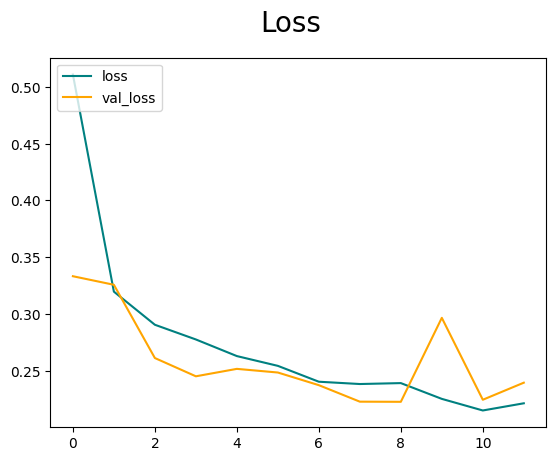

In [18]:
fig = plt.figure()
plt.plot(history.history["loss"],color="teal",label="loss")
plt.plot(history.history["val_loss"],color="Orange",label="val_loss")
fig.suptitle("Loss",fontsize=20)
plt.legend(loc="upper left")
plt.show()

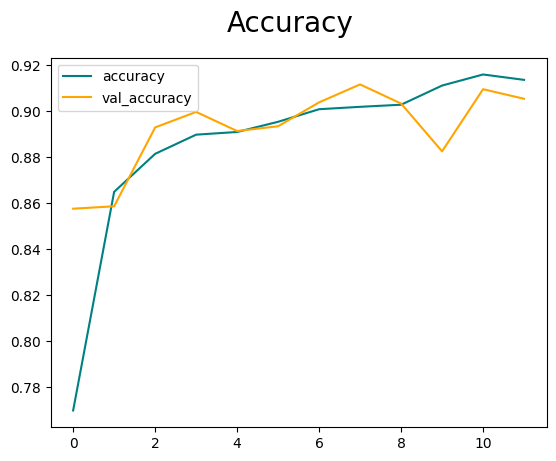

In [19]:
fig = plt.figure()
plt.plot(history.history["accuracy"],color="teal",label="accuracy")
plt.plot(history.history["val_accuracy"],color="Orange",label="val_accuracy")
fig.suptitle("Accuracy",fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [20]:
from tensorflow.keras.models import save_model
model.save('cnn_model_updated.h5')